<a href="https://colab.research.google.com/github/arthuc01/Metabolomics/blob/main/BarleyMetabolomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate and Multivariate Metabolomics Data Analysis
####MTBLS5778: Environmental impacts on barley grain composition and longevity
*Hana Dufková, Miroslav Berka, Vratislav Psota, Břetislav Brzobohatý, Martin Černý*

In this activity, you will analyze how environmental factors influence the metabolite content of barley grains. Grains are collected from barley plants grown at 12 different testing stations, each experiencing varying temperature and precipitation conditions. You will examine how these environmental variables affect the levels of key metabolites in the grains. Focus on identifying metabolites, such as catechin (a phenolic compound), that could serve as markers for barley yield.

https://www.ebi.ac.uk/metabolights/editor/MTBLS5778/descriptors

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
import scipy.cluster.hierarchy as sch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import re


In [ ]:
# Load the dataset from Google Drive or upload manually
file_path = "m_MTBLS5778_GC-MS___metabolite_profiling_v2_maf.xlsx"  # Replace with actual file path in Google Colab

# Load data
df = pd.read_excel(file_path, sheet_name=0)  # Assuming first sheet contains data

# Inspect first few rows to understand the structure
display(df.head())

,database_identifier,chemical_formula,smiles,inchi,metabolite_identification,mass_to_charge,fragmentation,modifications,charge,retention_time,...,63_Location_Verovany_(n.9)_Genotype_Bojos_Field_B,64_Location_Verovany_(n.9)_Genotype_Kangoo_Field_B,65_Location_Verovany_(n.9)_Genotype_Sebastian_Field_B,66_Location_Verovany_(n.9)_Genotype_Bojos_Field_A,67_Location_Caslav_(n.5)_Genotype_Sebastian_Field_A,68_Location_Caslav_(n.5)_Genotype_Bojos_Field_B,69_Location_Caslav_(n.5)_Genotype_Kangoo_Field_A,70_Location_Caslav_(n.5)_Genotype_Bojos_Field_A,71_Location_Caslav_(n.5)_Genotype_Kangoo_Field_B,72_Location_Caslav_(n.5)_Genotype_Sebastian_Field_B
0,"Sucrose, 8TMS",C36H86O11Si8,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@]1(C...,InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(2...,Sucrose,918.43188,NaN,TMS,1,27.901,...,2.123564e+10,2.527327e+10,3.051666e+10,2.110542e+10,2.492941e+10,2.032152e+10,2.396124e+10,2.063389e+10,2.490902e+10,4.581319e+09
1,"L-Malic acid, 3TMS",C13H30O5Si3,C([C@@H](C(=O)[O-])O)C(=O)[O-],"InChI=1S/C4H6O5/c5-2(4(8)9)1-3(6)7/h2,5H,1H2,(...",L-Malic acid,350.13956,NaN,TMS,1,15.738,...,2.192242e+08,2.459378e+08,3.383762e+08,2.071567e+08,3.316840e+08,2.240085e+08,2.385830e+08,2.379676e+08,2.525008e+08,8.070800e+04
2,"Maltose, 8TMS 1MOX isomer 1",C37H89NO11Si8,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]1[...,InChI=1S/C12H22O11/c13-1-3-5(15)6(16)9(19)12(2...,Maltose,947.45843,NaN,"TMS, MOX",1,28.718,...,1.003796e+09,5.968652e+08,2.029925e+09,1.286474e+09,1.394743e+09,1.463444e+09,1.080833e+09,1.163894e+09,8.870375e+08,2.178579e+10
3,"D-Fructose, 5TMS 1MOX isomer 1",C22H55NO6Si5,C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O,InChI=1S/C6H12O6/c7-1-3(9)5(11)6(12)4(10)2-8/h...,D-Fructose,569.28702,NaN,"TMS, MOX",1,20.533,...,2.754920e+09,3.749094e+09,3.939846e+09,2.623686e+09,3.611527e+09,2.171828e+09,3.059519e+09,2.131481e+09,4.055655e+09,1.150000e+12
4,"D-Fructose, 5TMS 1MOX isomer 2",C22H55NO6Si5,C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O,InChI=1S/C6H12O6/c7-1-3(9)5(11)6(12)4(10)2-8/h...,D-Fructose,569.28702,NaN,"TMS, MOX",1,20.642,...,2.380183e+09,3.061236e+09,3.077444e+09,2.155918e+09,2.953019e+09,1.850983e+09,2.611578e+09,1.828783e+09,3.436238e+09,7.836749e+10


Spring Barley types Bojos and Kangoo and Sebastien

In [ ]:

# Extract metadata and numerical metabolite values
metadata_cols = df[["database_identifier"]]  # Use database_identifier as the metabolite name column
data_cols = df.iloc[:, 23:]  # Remaining columns are locations
data_cols.head()

,1_Location_Staakov_(n.7)_Genotype_Bojos_Field_A,2_Location_Staakov_(n.7)_Genotype_Kangoo_Field_B,3_Location_Kujavy_(n.12)_Genotype_Kangoo_Field_A,4_Location_Staakov_(n.7)_Genotype_Kangoo_Field_B,5_Location_Kujavy_(n.12)_Genotype_Bojos_Field_A,6_Location_Kujavy_(n.12)_Genotype_Sebastian_Field_B,7_Location_Staakov_(n.7)_Genotype_Bojos_Field_A,8_Location_Kujavy_(n.12)_Genotype_Sebastian_Field_B,9_Location_Staakov_(n.7)_Genotype_Sebastian_Field_A,10_Location_Lipa_(n.4)_Genotype_Sebastian_Field_B,...,63_Location_Verovany_(n.9)_Genotype_Bojos_Field_B,64_Location_Verovany_(n.9)_Genotype_Kangoo_Field_B,65_Location_Verovany_(n.9)_Genotype_Sebastian_Field_B,66_Location_Verovany_(n.9)_Genotype_Bojos_Field_A,67_Location_Caslav_(n.5)_Genotype_Sebastian_Field_A,68_Location_Caslav_(n.5)_Genotype_Bojos_Field_B,69_Location_Caslav_(n.5)_Genotype_Kangoo_Field_A,70_Location_Caslav_(n.5)_Genotype_Bojos_Field_A,71_Location_Caslav_(n.5)_Genotype_Kangoo_Field_B,72_Location_Caslav_(n.5)_Genotype_Sebastian_Field_B
0,9.660043e+09,9.075635e+09,1.382255e+10,1.698263e+10,1.195252e+10,1.295707e+10,7424159492,1.052681e+10,1.057316e+10,1.216394e+10,...,2.123564e+10,2.527327e+10,3.051666e+10,2.110542e+10,2.492941e+10,2.032152e+10,2.396124e+10,2.063389e+10,2.490902e+10,4.581319e+09
1,3.135232e+08,2.925669e+08,2.728232e+08,2.653480e+08,2.555703e+08,2.875191e+08,232282477,2.681871e+08,3.259298e+08,3.532216e+08,...,2.192242e+08,2.459378e+08,3.383762e+08,2.071567e+08,3.316840e+08,2.240085e+08,2.385830e+08,2.379676e+08,2.525008e+08,8.070800e+04
2,1.525147e+09,1.073949e+09,1.331063e+09,1.264284e+09,1.678083e+09,1.890677e+09,1206395501,1.753546e+09,1.643973e+09,1.751338e+09,...,1.003796e+09,5.968652e+08,2.029925e+09,1.286474e+09,1.394743e+09,1.463444e+09,1.080833e+09,1.163894e+09,8.870375e+08,2.178579e+10
3,3.646251e+09,4.842220e+09,6.101781e+09,4.090173e+09,4.602541e+09,6.002876e+09,3656779617,5.763634e+09,4.490156e+09,4.623148e+09,...,2.754920e+09,3.749094e+09,3.939846e+09,2.623686e+09,3.611527e+09,2.171828e+09,3.059519e+09,2.131481e+09,4.055655e+09,1.150000e+12
4,2.770980e+09,3.736361e+09,4.609639e+09,3.123710e+09,3.586053e+09,4.604794e+09,2781153656,4.374672e+09,3.430593e+09,3.479232e+09,...,2.380183e+09,3.061236e+09,3.077444e+09,2.155918e+09,2.953019e+09,1.850983e+09,2.611578e+09,1.828783e+09,3.436238e+09,7.836749e+10


In [ ]:
# Extract category labels (Field and Genotype) from column names
def extract_category(name):
    match = re.search(r"\d+_Location_.*?_Genotype_(.*?)_Field_(.*?)$", name)
    return match.groups() if match else ("Unknown", "Unknown")

categories = [extract_category(col) for col in data_cols.columns]
categories_df = pd.DataFrame(categories, columns=["Genotype", "Field"], index=data_cols.columns)
categories_df.head()

,Genotype,Field
1_Location_Staakov_(n.7)_Genotype_Bojos_Field_A,Bojos,A
2_Location_Staakov_(n.7)_Genotype_Kangoo_Field_B,Kangoo,B
3_Location_Kujavy_(n.12)_Genotype_Kangoo_Field_A,Kangoo,A
4_Location_Staakov_(n.7)_Genotype_Kangoo_Field_B,Kangoo,B
5_Location_Kujavy_(n.12)_Genotype_Bojos_Field_A,Bojos,A


In [ ]:
# Transpose data so rows are locations and columns are metabolites
data_transposed = data_cols.transpose()
data_transposed.columns = metadata_cols.iloc[:, 0]  # Retain metabolite names as column names

# Convert data to numeric for analysis
data = data_transposed.apply(pd.to_numeric, errors='coerce')

# Normalize the data
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Combine category labels with normalized data
categorized_data = pd.concat([categories_df, data_normalized], axis=1)
categorized_data.head()

,Genotype,Field,"Sucrose, 8TMS","L-Malic acid, 3TMS","Maltose, 8TMS 1MOX isomer 1","D-Fructose, 5TMS 1MOX isomer 1","D-Fructose, 5TMS 1MOX isomer 2","Citric acid, 4TMS","Maltose, 8TMS 1MOX isomer 2","Phosphoric acid, 3TMS",...,"N-Methylnicotinamide,TMS derivative","9,12,15-Octadecatrienoic acid, methyl ester, (Z,Z,Z)-","Phenol, TMS derivative","Tyrosol, 2TMS derivative","L-Glutamine, 3TMS [-H2O]","1H-Indene, 2,3-dihydro-1,1,3-trimethyl-3-phenyl-","M000717_A252001-101-xxx_NA_2504,62_PRED_VAR5_ALK_Tryptamine, 5-hydroxy- (3TMS)","3,4-Dimethylbenzoic acid, TMS derivative","Phloroglucinol, 3TMS","L-Ornithine, 5TMS"
1_Location_Staakov_(n.7)_Genotype_Bojos_Field_A,Bojos,A,-0.204600,0.003820,-0.262895,-0.381020,-0.226165,-0.191261,-0.255589,-0.316093,...,0.089812,-0.217498,-0.182642,-0.254176,-0.819275,-0.172588,-0.942035,-0.166169,-0.236773,-0.228697
2_Location_Staakov_(n.7)_Genotype_Kangoo_Field_B,Kangoo,B,-0.204828,-0.032978,-0.267548,-0.377714,-0.221830,-0.181376,-0.259566,-0.022644,...,0.721052,-0.218250,-0.183026,-0.288899,-0.086216,-0.172631,-0.940786,-0.171974,-0.237274,-0.230216
3_Location_Kujavy_(n.12)_Genotype_Kangoo_Field_A,Kangoo,A,-0.202979,-0.067646,-0.264897,-0.374233,-0.217908,-0.242748,-0.253994,-0.143091,...,1.336723,-0.216055,-0.180955,-0.288146,-0.816430,-0.172562,0.920315,-0.169336,-0.174051,-0.228941
4_Location_Staakov_(n.7)_Genotype_Kangoo_Field_B,Kangoo,B,-0.201747,-0.080771,-0.265585,-0.379793,-0.224581,-0.266480,-0.257281,-0.144113,...,1.060779,-0.218614,-0.182438,-0.287346,-0.237545,-0.172822,-0.940703,-0.171942,-0.233740,-0.229133
5_Location_Kujavy_(n.12)_Genotype_Bojos_Field_A,Bojos,A,-0.203707,-0.097940,-0.261318,-0.378377,-0.222505,-0.303664,-0.253692,-0.213815,...,1.573295,-0.216224,-0.183702,-0.265913,0.130305,-0.172840,0.033313,-0.170833,-0.239984,-0.230551


In [ ]:
# Univariate Analysis
## Summary Statistics
summary_stats = data_normalized.describe()
display(summary_stats)

database_identifier,"Sucrose, 8TMS","L-Malic acid, 3TMS","Maltose, 8TMS 1MOX isomer 1","D-Fructose, 5TMS 1MOX isomer 1","D-Fructose, 5TMS 1MOX isomer 2","Citric acid, 4TMS","Maltose, 8TMS 1MOX isomer 2","Phosphoric acid, 3TMS","myo-Inositol, 6TMS","D-Mannose, 5TMS 1MOX isomer 1",...,"N-Methylnicotinamide,TMS derivative","9,12,15-Octadecatrienoic acid, methyl ester, (Z,Z,Z)-","Phenol, TMS derivative","Tyrosol, 2TMS derivative","L-Glutamine, 3TMS [-H2O]","1H-Indene, 2,3-dihydro-1,1,3-trimethyl-3-phenyl-","M000717_A252001-101-xxx_NA_2504,62_PRED_VAR5_ALK_Tryptamine, 5-hydroxy- (3TMS)","3,4-Dimethylbenzoic acid, TMS derivative","Phloroglucinol, 3TMS","L-Ornithine, 5TMS"
count,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,...,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,7.200000e+01,7.200000e+01
mean,2.467162e-17,1.233581e-17,3.392348e-17,0.000000,-6.167906e-18,8.635068e-17,1.233581e-17,-6.784696e-17,3.083953e-17,1.233581e-17,...,-1.480297e-16,-2.467162e-17,3.083953e-18,-3.700743e-17,-1.850372e-16,-1.233581e-17,1.110223e-16,0.000000,-1.850372e-17,1.850372e-17
std,1.007018e+00,1.007018e+00,1.007018e+00,1.007018,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,...,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,1.007018e+00,1.007018,1.007018e+00,1.007018e+00
min,-2.083636e-01,-5.465556e-01,-2.733564e-01,-0.386056,-2.317851e-01,-6.131602e-01,-2.679105e-01,-5.860271e-01,-2.166285e-01,-3.172503e-01,...,-1.232564e+00,-2.190812e-01,-1.883245e-01,-3.076870e-01,-8.192747e-01,-1.728397e-01,-9.420349e-01,-0.179352,-2.530329e-01,-2.316031e-01
25%,-2.030808e-01,-1.552383e-01,-2.670937e-01,-0.382376,-2.269534e-01,-2.559085e-01,-2.577987e-01,-2.656829e-01,-2.084089e-01,-3.171451e-01,...,-1.082483e+00,-2.173761e-01,-1.831948e-01,-2.860177e-01,-5.304546e-01,-1.727969e-01,-9.397640e-01,-0.169359,-2.362695e-01,-2.302499e-01
50%,-1.994095e-01,-9.691918e-02,-2.648205e-01,-0.380313,-2.248266e-01,-1.912308e-01,-2.560721e-01,-1.915893e-01,-2.071699e-01,-3.168099e-01,...,-3.553670e-02,-2.161524e-01,-1.790671e-01,-2.666512e-01,-2.611982e-01,-1.727696e-01,-8.872828e-02,-0.162731,-2.253349e-01,-2.261219e-01
75%,-1.977223e-01,-1.811781e-02,-2.605564e-01,-0.375542,-2.198768e-01,-1.258193e-01,-2.521799e-01,-1.182403e-01,-2.055800e-01,-3.165922e-01,...,7.227586e-01,-2.139977e-01,-1.739041e-01,-2.390981e-01,3.738612e-02,-1.719713e-01,2.579190e-01,-0.154337,-2.063673e-01,-2.200087e-01
max,6.921184e+00,8.219493e+00,6.270478e+00,3.644414,7.081831e+00,5.371713e+00,6.066989e+00,5.516365e+00,6.885599e+00,4.895247e+00,...,2.879564e+00,4.834424e+00,7.255867e+00,5.515490e+00,5.583121e+00,6.259536e+00,3.879693e+00,8.087371,6.152803e+00,5.957954e+00


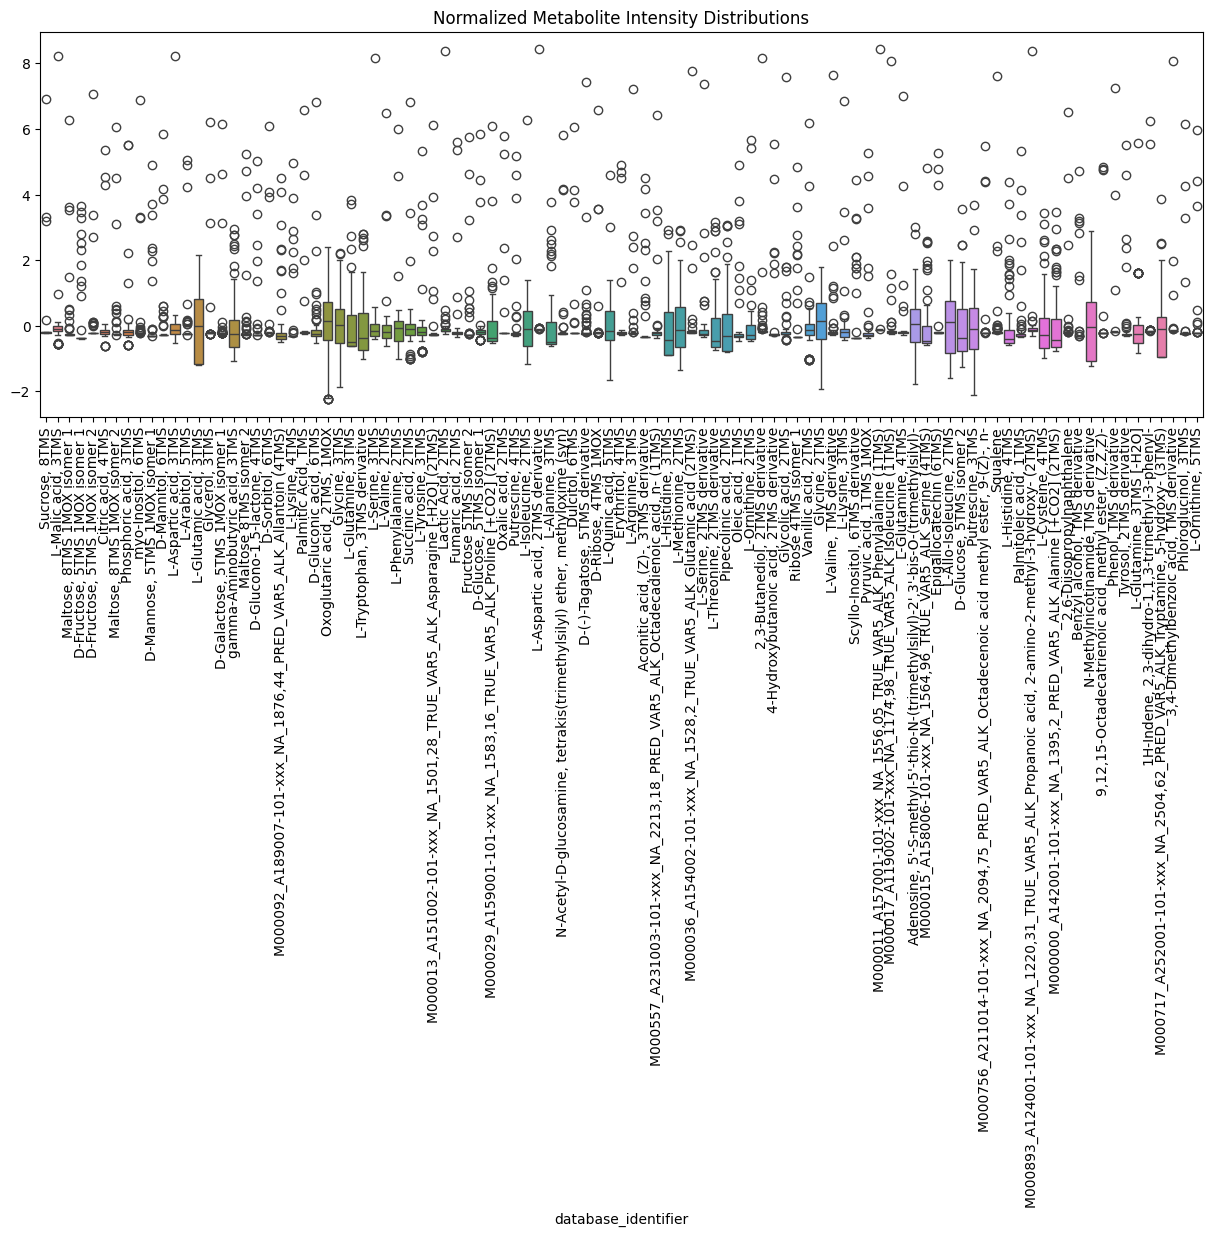

In [ ]:
## Boxplot to check data distribution
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_normalized)
plt.xticks(rotation=90)
plt.title("Normalized Metabolite Intensity Distributions")
plt.show()

In [ ]:
## T-test for a selected pair of locations
location_1 = data_normalized.iloc[0, :]  # Replace with specific location
location_2 = data_normalized.iloc[1, :]  # Replace with another location
t_stat, p_value = ttest_ind(location_1, location_2, nan_policy='omit')
print(f"T-test: t-statistic={t_stat}, p-value={p_value}")

T-test: t-statistic=1.1922080834663809, p-value=0.23462109677112303


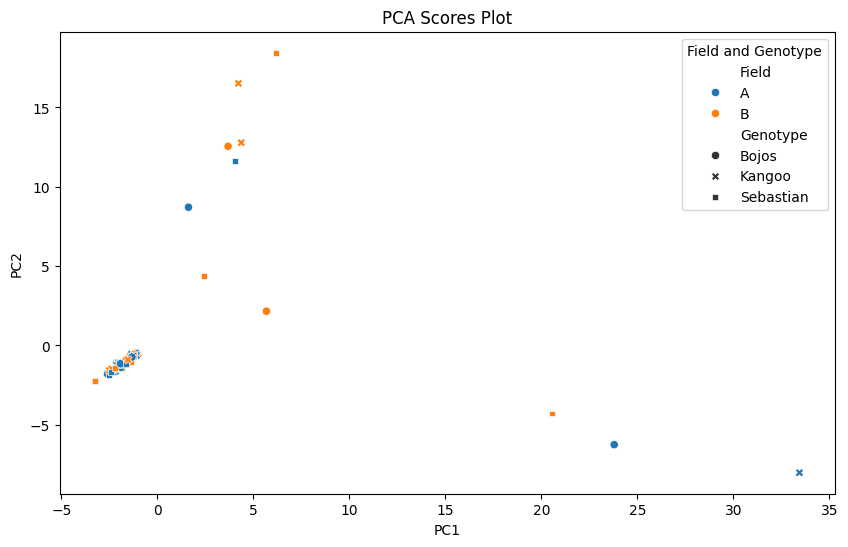

In [ ]:
# Multivariate Analysis
## PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Plot PCA scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=categories_df["Field"], style=categories_df["Genotype"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scores Plot")
plt.legend(title="Field and Genotype")
plt.show()

The loadings plot shows metabolites contributing to PC1. What does a metabolite with a large positive or negative loading value signify? How might you prioritize these metabolites for further study?

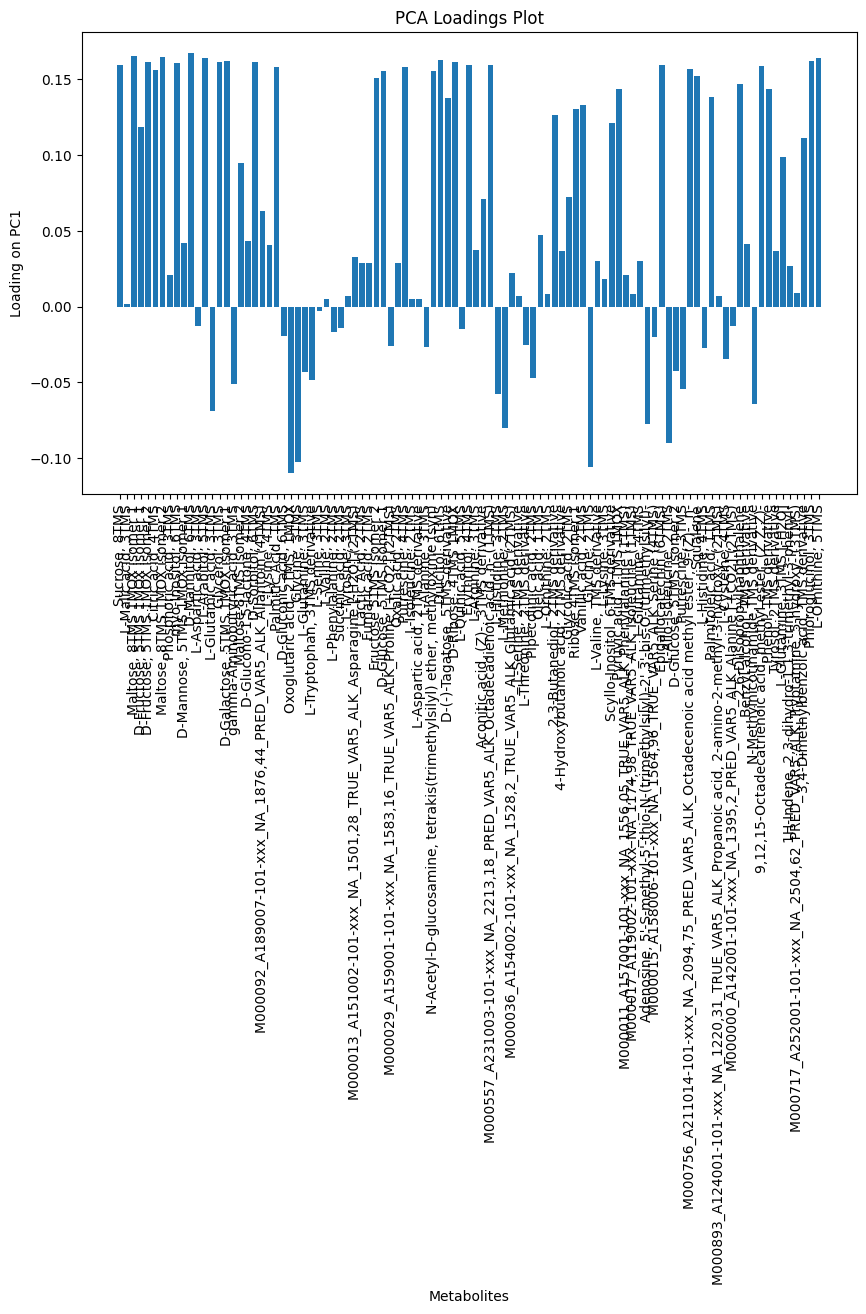

In [ ]:
# Plot PCA loadings
loadings = pca.components_.T
plt.figure(figsize=(10, 6))
plt.bar(range(loadings.shape[0]), loadings[:, 0])
plt.xticks(range(loadings.shape[0]), data.columns, rotation=90)
plt.xlabel("Metabolites")
plt.ylabel("Loading on PC1")
plt.title("PCA Loadings Plot")
plt.show()

The dendrogram uses the Ward linkage method. What does this method optimize, and how might the dendrogram change with "complete" or "single" linkage?



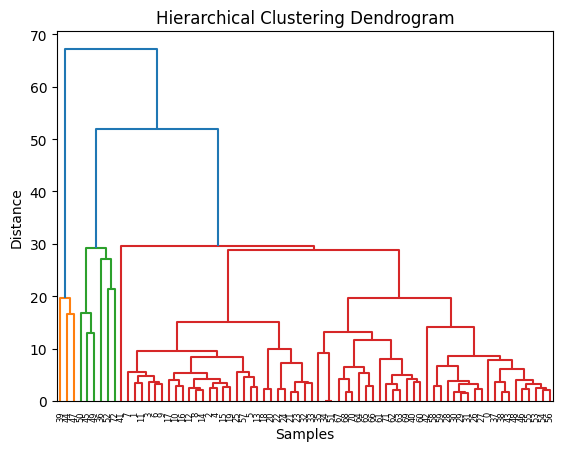

In [ ]:

## Hierarchical Clustering
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


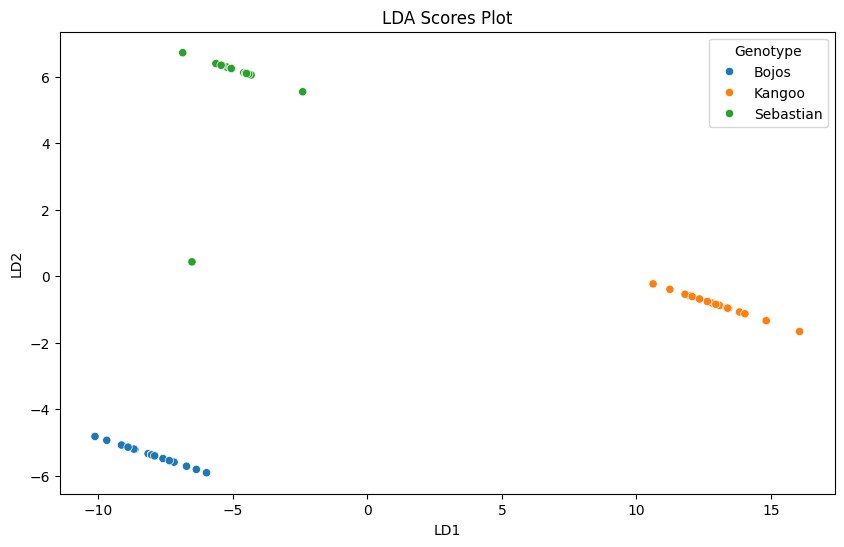

In [ ]:
## LDA (if class labels available)
lda = LDA(n_components=2)
lda_result = lda.fit_transform(data_normalized, categories_df["Genotype"])

# Plot LDA scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lda_result[:, 0], y=lda_result[:, 1], hue=categories_df["Genotype"])
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Scores Plot")
plt.show()


In [ ]:
# Volcano Plot for Field Comparison
## Select two fields to compare
field_1 = "A"
field_2 = "B"

## Get data for each field (assuming 'data_normalized' is a DataFrame)
field_1_data = data[categories_df["Field"] == field_1]
field_2_data = data[categories_df["Field"] == field_2]

## Perform t-tests for each metabolite (column)
t_stats, p_values = ttest_ind(field_1_data, field_2_data, nan_policy='omit')

# Initialize lists to store fold changes and log2 fold changes
fold_changes = []
# Iterate over each metabolite (column)
for column in data.columns:
    #print(column)
    # Calculate mean values for the metabolite in each field
    ## Perform t-tests for each metabolite (column)
    #print(field_1_data[column])
    #print(field_2_data[column])
    mean_field_1 = float(field_1_data[column].mean(skipna=True))
    mean_field_2 = float(field_2_data[column].mean(skipna=True))

    # Calculate fold change (field_2 mean / field_1 mean)
    fold_change = mean_field_2 / mean_field_1
    #print(column, mean_field_1, mean_field_2, fold_change)

    # Append results to the lists
    fold_changes.append(fold_change)

# Convert results to pandas Series for easy reference
fold_changes = pd.Series(fold_changes, index=data_normalized.columns, name='Fold Change')


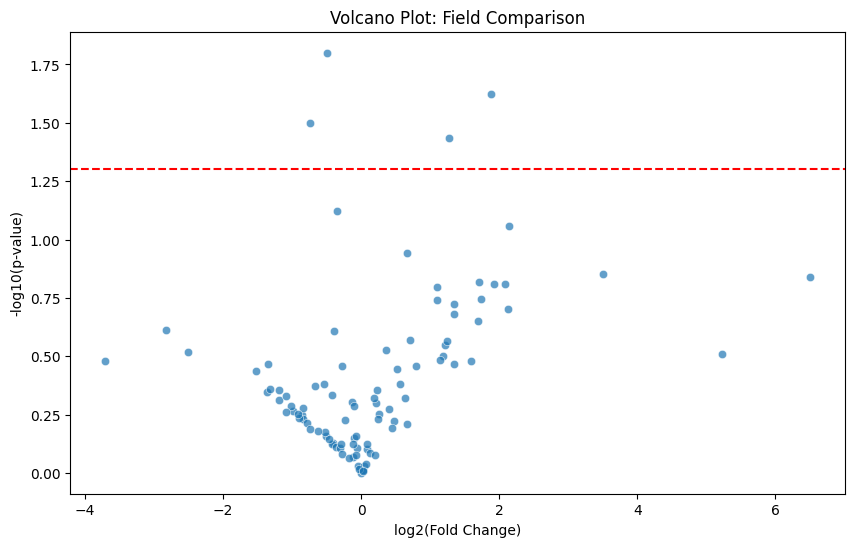

In [ ]:

## Create volcano plot
df_volcano = pd.DataFrame({"Fold Change": np.log2(fold_changes), "-log10(p-value)": -np.log10(p_values)})
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_volcano["Fold Change"], y=df_volcano["-log10(p-value)"], alpha=0.7)
plt.axhline(-np.log10(0.05), color='red', linestyle='dashed')
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot: Field Comparison")
plt.show()


In [ ]:

fold_changes

,Fold Change
database_identifier,
"Sucrose, 8TMS",0.390021
"L-Malic acid, 3TMS",1.629388
"Maltose, 8TMS 1MOX isomer 1",0.753199
"D-Fructose, 5TMS 1MOX isomer 1",1.553396
"D-Fructose, 5TMS 1MOX isomer 2",0.550659
...,...
"1H-Indene, 2,3-dihydro-1,1,3-trimethyl-3-phenyl-",90.322966
"M000717_A252001-101-xxx_NA_2504,62_PRED_VAR5_ALK_Tryptamine, 5-hydroxy- (3TMS)",0.922027
"3,4-Dimethylbenzoic acid, TMS derivative",0.176539


In [ ]:
p_values

array([0.45063801, 0.27017937, 0.74464089, 0.47649617, 0.56713201,
       0.46254721, 0.74882799, 0.03655149, 0.48491168, 0.28355227,
       0.69416018, 0.41403177, 0.77560793, 0.34811005, 0.44089274,
       0.43580643, 0.50105822, 0.61438412, 0.17907795, 0.54147877,
       0.41631241, 0.08747264, 0.34131751, 0.85714324, 0.94818493,
       0.49885285, 0.93185768, 0.03175845, 0.34969753, 0.35769478,
       0.29766028, 0.78860966, 0.55732956, 0.15495801, 0.3426154 ,
       0.20800026, 0.71405943, 0.42602847, 0.53434513, 0.33272043,
       0.78051859, 0.44041595, 0.33263961, 0.82393938, 0.83132605,
       0.58604447, 0.46993512, 0.51605765, 0.01583718, 0.66931572,
       0.19742738, 0.18963721, 0.75402242, 0.99744844, 0.70529508,
       0.14108336, 0.85841108, 0.93265845, 0.595423  , 0.02389656,
       0.15996027, 0.54872165, 0.31687274, 0.18073266, 0.98134972,
       0.24550673, 0.69696771, 0.22407191, 0.9724501 , 0.60164761,
       0.6413238 , 0.30899259, 0.66320075, 0.15539743, 0.07533

In [ ]:
# Sort metabolites by fold change (absolute value) to identify biggest differences
sorted_fold_changes = fold_changes.abs().sort_values(ascending=False)

# Select top N metabolites with the largest fold change differences
top_n = 10  # You can change this to select more or fewer metabolites
top_metabolites = sorted_fold_changes.head(top_n).index
print(top_metabolites)


Index(['1H-Indene, 2,3-dihydro-1,1,3-trimethyl-3-phenyl-',
       'M000011_A157001-101-xxx_NA_1556,05_TRUE_VAR5_ALK_Phenylalanine (1TMS)',
       'M000036_A154002-101-xxx_NA_1528,2_TRUE_VAR5_ALK_Glutamic acid (2TMS)',
       'L-Lysine, 4TMS', 'L-Arginine, 3TMS', 'L-Glutamine, 4TMS',
       'M000013_A151002-101-xxx_NA_1501,28_TRUE_VAR5_ALK_Asparagine [-H2O] (2TMS)',
       'Oleic acid, 1TMS', 'D-Glucono-1,5-lactone, 4TMS',
       'Benzyl alcohol, TMS derivative'],
      dtype='object', name='database_identifier')


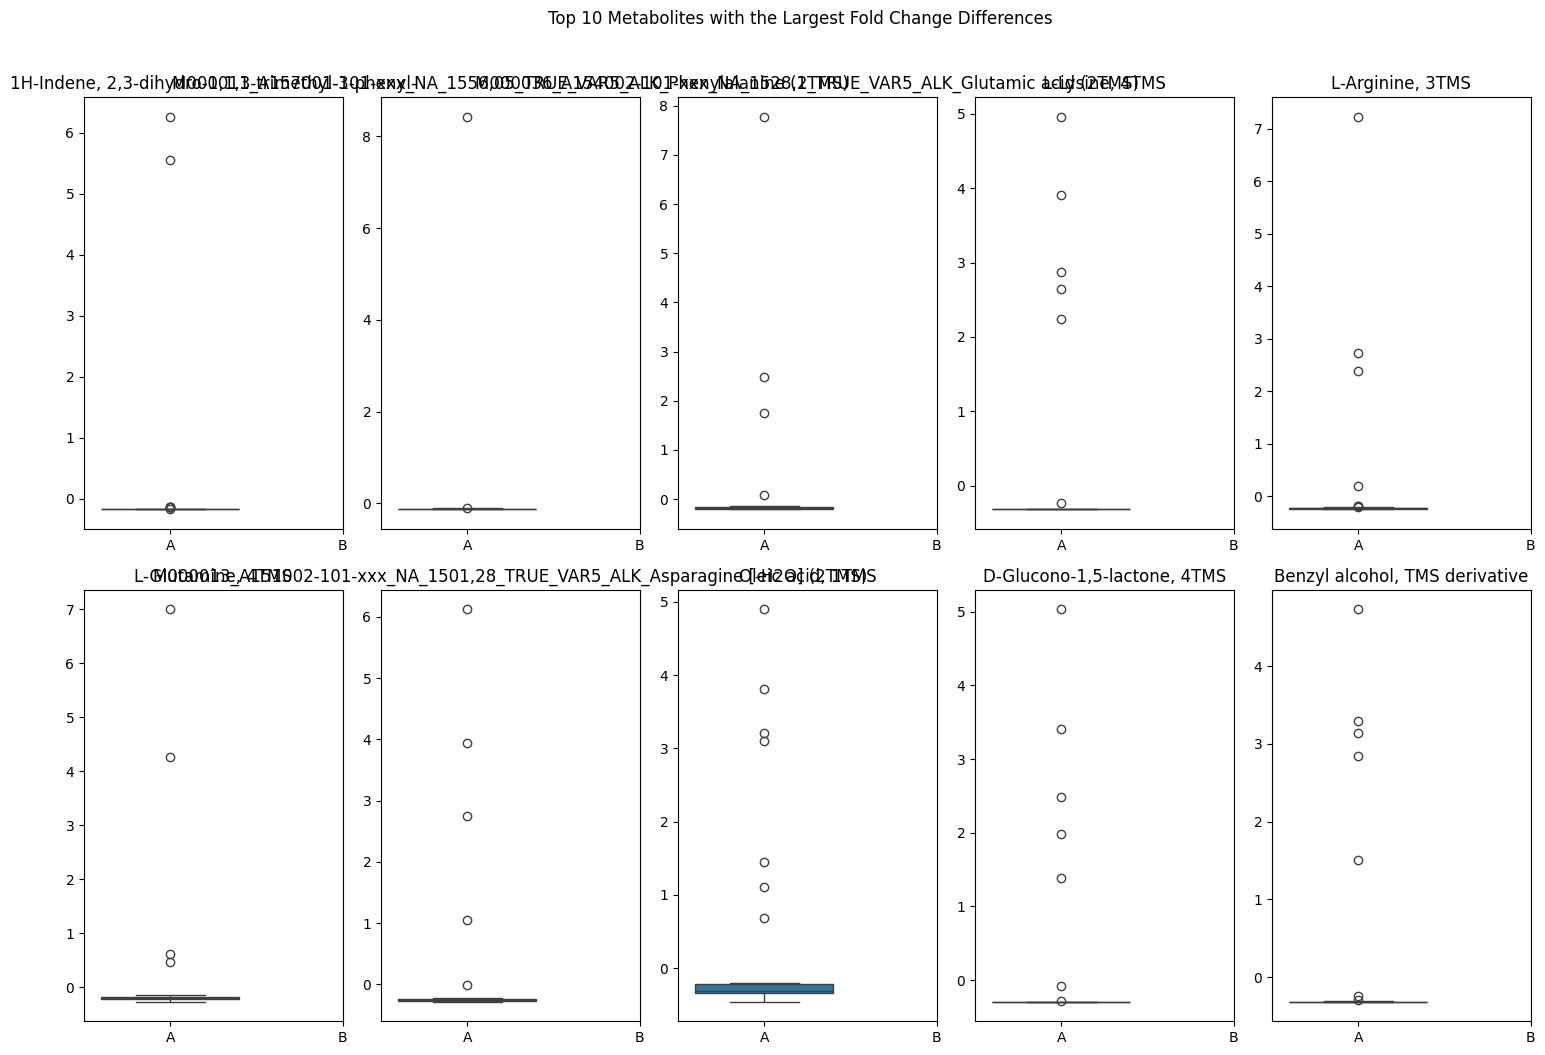

In [ ]:
## Get data for each field (assuming 'data_normalized' is a DataFrame)
field_1_data = data_normalized[categories_df["Field"] == field_1]
field_2_data = data_normalized[categories_df["Field"] == field_2]

top_metabolites
# Plot boxplots for the top N metabolites comparing fields A and B
plt.figure(figsize=(15, 10))

for i, metabolite in enumerate(top_metabolites, 1):
    plt.subplot(2, 5, i)  # Create a 2-row, 5-column grid for the subplots
    # Create boxplots for field_1_data and field_2_data for each metabolite
    sns.boxplot(data=[field_1_data[metabolite], field_2_data[metabolite]])
    plt.xticks([0, 1], [field_1, field_2])  # Set x-axis labels to field names
    plt.title(f"{metabolite}")

plt.tight_layout()
plt.suptitle("Top 10 Metabolites with the Largest Fold Change Differences", y=1.05)
plt.show()